# Beberapa Penerapan dari Algoritma-Algoritma Kecerdasan Buatan

## Algoritma Genetika

1. Menggunakan bahasa pemrograman python
2. Menggunakan library **PyGAD**

**PyGAD**: Python library untuk algoritma genetika [https://pygad.readthedocs.io/en/latest/](https://pygad.readthedocs.io/en/latest/)

<p align="center">
  <img src="img/img1.png" />
</p>

- Cara install library **PyGAD**:

`pip install pygad`

### Bagaimana cara menggunakan **PyGAD**?

1. Persiapkan parameter `fitness_func`
2. Persiapkan parameter lainnya
3. Import `pygad`
4. Membuat *instance* dari `pygad.GA` *class*
5. Jalankan GA
6. Plot hasilnya
7. Tampilkan solusi terbaik

## Penerapan GA

### Contoh 1 - Fungsi Minimum

1. Contoh penggunaan PyGAD dalam optimalisasi.
2. Mengoptimalkan persamaan

$$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $$

3. Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum

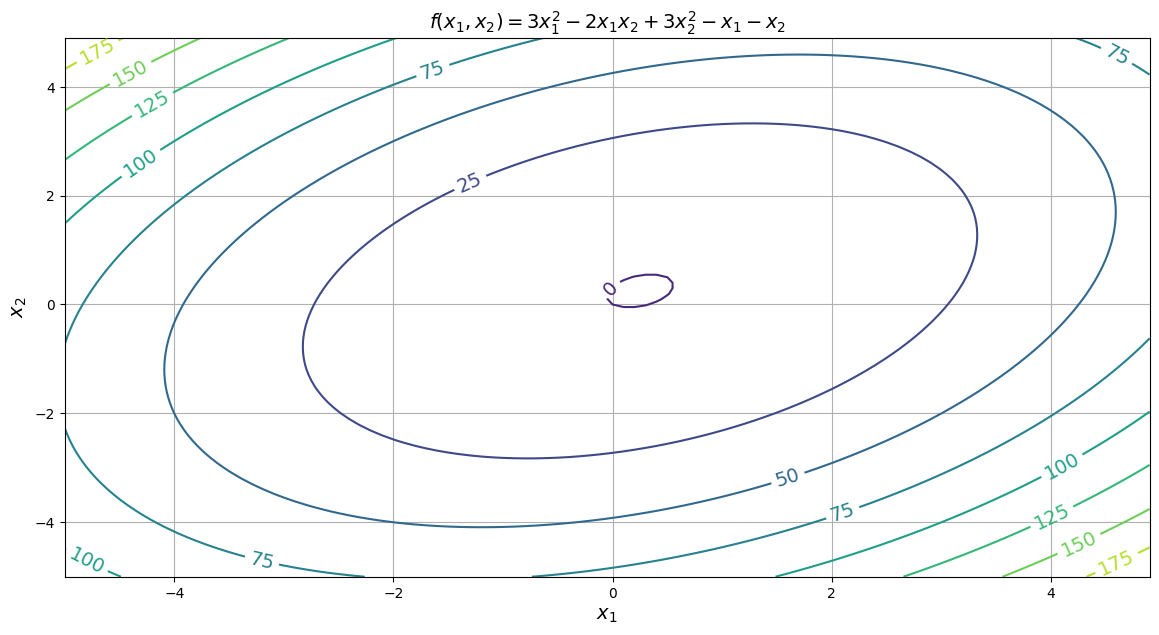

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y

x = np.vstack((np.array([np.arange(-5,5,0.1)]),
               np.array([np.arange(-5,5,0.1)])))

X,Y = np.meshgrid(x[0], x[1])
Z = pers1(X,Y)
fig, ax = plt.subplots(figsize=(14, 7))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=14)
ax.set_title('$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $', fontsize=14)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.grid()

#### 1. Persiapkan parameter `fitness_func`

- Persiapkan parameter `fitness_func`
- Gunakan persamaan $$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $$
- Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum

In [2]:
def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y

def calculate_fitness(ga_instance, solution, solution_idx):
    output = pers1(solution[0],solution[1])
    fitness = -output

    return fitness

#### 2. Persiapkan parameter lainnya

In [3]:
num_generations = 20
num_parents_mating = 3
sol_per_pop = 10
num_genes = 2
parent_selection_type="sss"
keep_parents=1
crossover_type="uniform"
mutation_type="random"
mutation_probability = .5

def on_generation(ga):
    print("Generation", ga.generations_completed)
    print(ga.population)

#### 3. Import `pygad`

In [4]:
import pygad

#### 4. Membuat *instance* dari `pygad.GA` *class*

In [5]:
ga_instance1 = pygad.GA(num_generations = num_generations,
                       num_parents_mating = num_parents_mating,
                       fitness_func = calculate_fitness,
                       sol_per_pop = sol_per_pop,
                       num_genes = num_genes,
                       parent_selection_type = parent_selection_type,
                       keep_parents = keep_parents,
                       crossover_type = crossover_type,
                       mutation_type = mutation_type,
                       mutation_probability = mutation_probability,
                       on_generation = on_generation
                       )

/home/fafa/miniconda3/envs/py311/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


#### 5. Jalankan GA

In [6]:
ga_instance1.run()

Generation 1
[[-0.50096932  0.86006499]
 [-0.14921975  0.42574652]
 [ 0.26938154 -1.510018  ]
 [ 0.90497265  0.86006499]
 [ 0.26938154  0.86006499]
 [ 0.6511202  -2.06926945]
 [-0.50096932  0.86006499]
 [-0.50096932 -1.62695781]
 [ 1.21721774 -1.6769478 ]
 [-0.50096932  0.86006499]]
Generation 2
[[-0.14921975  0.42574652]
 [-1.05551386  0.93304987]
 [-0.4982805   0.86006499]
 [ 0.3843557   1.71837065]
 [-0.14921975  0.86006499]
 [ 0.43188149 -0.1362603 ]
 [ 0.90497265  0.42574652]
 [-0.12320431  0.42574652]
 [-0.16178391  0.86006499]
 [-0.16856059  0.41191921]]
Generation 3
[[-0.12320431  0.42574652]
 [ 0.43188149 -0.1362603 ]
 [-0.46834257 -0.1362603 ]
 [ 0.64067506  0.42574652]
 [-0.11399552  0.39854326]
 [ 0.43188149 -0.1362603 ]
 [-0.12320431 -0.55976311]
 [ 0.43188149 -0.1362603 ]
 [-0.14921975  0.42574652]
 [-0.14921975  0.42574652]]
Generation 4
[[ 0.64067506  0.42574652]
 [ 0.64067506 -0.50193675]
 [ 0.17420246  0.39854326]
 [-0.12320431  0.16707477]
 [ 0.6390782  -0.5538617 ]


#### 6. Plot hasilnya

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


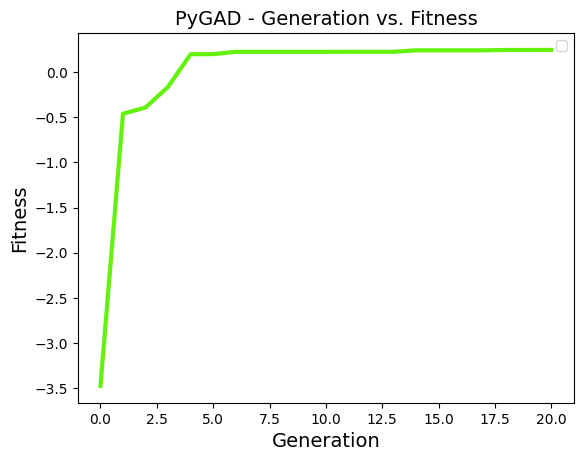

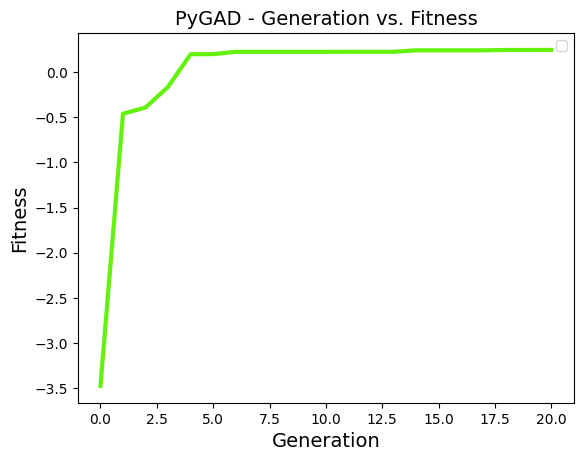

In [7]:
ga_instance1.plot_fitness()

#### 7. Tampilkan solusi terbaik

In [8]:
solution, solution_fitness, solution_idx = ga_instance1.best_solution()
print(f"Parameters dari solusi terbaik : {solution}")
print(f"Nilai fitness dari solusi terbaik = {-solution_fitness}")

Parameters dari solusi terbaik : [0.25946041 0.29273843]
Nilai fitness dari solusi terbaik = -0.2450604289172887


### Contoh 2 - Travelling Salesman Problem

1. Mencari rute terbaik
2. Mengunjungi semua kedai kopi janji jiwa
3. Mulai dari ITK, kembali ke ITK

<p align="center">
  <img src="img/img2.png" />
</p>

#### 1. Persiapkan parameter `fitness_func`

- Membuat tabel berisikan semua jarak antar titik
- Jarak dari ITK ke Janji Jiwa Grand City
<p align="center">
    <img src="img/img3.png" />
</p>

- Jarak dari ITK ke Janji Jiwa Bumi Nirwana

<p align="center">
    <img src="img/img4.png" />
</p>

- Jarak dari Janji Jiwa Grand City ke Janji Jiwa Bumi Nirwana

<p align="center">
    <img src="img/img5.png" />
</p>

- Sehingga didapatkan keseluruhan jarak antara semua titik
- Simpan dalam format file **csv**
<p align="center">
    <img src="img/img6.png" />
</p>

- Bagaimana `fitness_func`-nya?
- Optimalkan rute terpendek
- Contoh:
    - ITK--12.1 KM--Indrakila--3.3 KM--Grand City--2.6 KM--MT. Haryono--1.8 KM--Ruhui Rahayu--7.9 KM--Ahmad Yani--20.5 KM--ITK
    - TOTAL = 48.2 KM

In [9]:
import pandas as pd

data = pd.read_csv('data_janji_jiwa.csv')
data

,JARAK (KM),ITK,INDRAKILA,GRAND CITY,MT. HARYONO,RUHUI RAHAYU,AHMAD YANI
0,ITK,0.0,12.1,12.4,14.7,16.4,20.5
1,INDRAKILA,12.1,0.0,3.3,3.7,5.4,6.2
2,GRAND CITY,12.4,3.3,0.0,2.6,4.3,9.0
3,MT. HARYONO,14.7,3.7,2.6,0.0,1.7,6.8
4,RUHUI RAHAYU,16.4,5.4,4.3,1.8,0.0,7.9
5,AHMAD YANI,20.5,6.2,9.0,6.8,7.9,0.0


In [10]:
data.iloc[0]

JARAK (KM)       ITK
ITK              0.0
INDRAKILA       12.1
GRAND CITY      12.4
MT. HARYONO     14.7
RUHUI RAHAYU    16.4
AHMAD YANI      20.5
Name: 0, dtype: object

In [11]:
data.iloc[0,1]

0.0

In [12]:
data.iloc[0,1+1]

12.1

In [13]:
data.iloc[1]

JARAK (KM)      INDRAKILA
ITK                  12.1
INDRAKILA             0.0
GRAND CITY            3.3
MT. HARYONO           3.7
RUHUI RAHAYU          5.4
AHMAD YANI            6.2
Name: 1, dtype: object

In [14]:
def cal_fitness(ga_instance, solution, solution_idx):
    distance = 0
    # 0 1 2 3 4
    for i in range(len(solution)):
        if i == 0:
            distance += data.iloc[0, solution[i]+1]
        elif i == len(solution)-1:
            distance += data.iloc[solution[i-1], solution[i]+1] + data.iloc[solution[i], 1]
        else:
            distance += data.iloc[solution[i-1], solution[i]+1]

    return -distance

#### 2. Persiapkan parameter lainnya

In [15]:
num_generations = 20
num_parents_mating = 2
sol_per_pop = 10
num_genes = 5
gene_type = int
gene_space = np.arange(1,len(data))
allow_duplicate_genes=False
mutation_type='random'
mutation_percent_genes=50

def on_generation(ga):
    print("Generation", ga.generations_completed)
    print(ga.population)

#### 3. Import `pygad`

In [16]:
import pygad

#### 4. Membuat *instance* dari `pygad.GA` *class*

In [17]:
ga_instance2 = pygad.GA(num_generations = num_generations,
                       num_parents_mating = num_parents_mating,
                       fitness_func = cal_fitness,
                       sol_per_pop = sol_per_pop,
                       num_genes = num_genes,
                       gene_type = gene_type,
                       gene_space = np.arange(1,len(data)),
                       allow_duplicate_genes = allow_duplicate_genes,
                       on_generation = on_generation,
                       mutation_type = mutation_type,
                       mutation_percent_genes = mutation_percent_genes
                       )

/home/fafa/miniconda3/envs/py311/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


#### 5. Jalankan GA

In [18]:
ga_instance2.run()

Generation 1
[[2 1 5 3 4]
 [4 2 1 5 3]
 [5 4 2 3 1]
 [1 4 2 5 3]
 [3 4 2 5 1]
 [2 1 3 5 4]
 [2 1 4 3 5]
 [3 4 2 1 5]
 [1 4 2 5 3]
 [2 5 1 3 4]]
Generation 2
[[2 1 5 3 4]
 [4 1 5 3 2]
 [3 4 2 1 5]
 [2 1 3 5 4]
 [1 4 5 3 2]
 [3 1 2 5 4]
 [3 4 2 5 1]
 [2 1 3 5 4]
 [4 2 5 3 1]
 [4 1 3 5 2]]
Generation 3
[[2 1 5 3 4]
 [3 4 5 2 1]
 [3 2 5 1 4]
 [1 5 2 3 4]
 [2 1 5 4 3]
 [3 4 5 2 1]
 [1 5 4 3 2]
 [5 1 2 3 4]
 [2 1 5 3 4]
 [2 4 5 3 1]]
Generation 4
[[1 5 4 3 2]
 [1 2 5 4 3]
 [1 3 4 5 2]
 [1 5 2 4 3]
 [1 5 4 3 2]
 [2 1 4 3 5]
 [5 3 4 1 2]
 [1 5 2 3 4]
 [1 5 4 3 2]
 [1 5 2 3 4]]
Generation 5
[[1 5 4 3 2]
 [2 5 1 3 4]
 [1 5 4 3 2]
 [1 5 4 3 2]
 [1 3 4 5 2]
 [1 5 3 4 2]
 [1 5 3 4 2]
 [1 5 4 3 2]
 [1 2 4 3 5]
 [4 5 1 3 2]]
Generation 6
[[1 5 4 3 2]
 [1 3 4 5 2]
 [1 3 4 2 5]
 [4 2 1 3 5]
 [1 5 4 3 2]
 [5 3 4 1 2]
 [2 5 4 3 1]
 [1 5 4 3 2]
 [1 5 4 3 2]
 [2 5 3 4 1]]
Generation 7
[[1 5 4 3 2]
 [1 5 3 2 4]
 [3 5 2 1 4]
 [1 5 4 2 3]
 [1 5 4 3 2]
 [4 5 1 3 2]
 [3 5 4 1 2]
 [1 5 4 3 2]
 [1 3 4 5 2]
 [4 1 

#### 6. Plot hasilnya

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


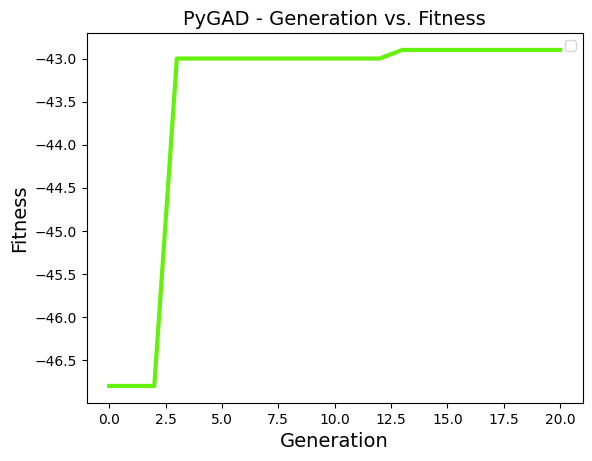

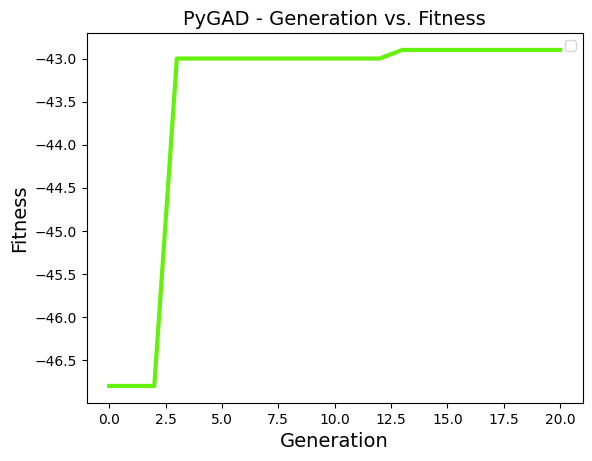

In [19]:
ga_instance2.plot_fitness()

#### 7. Tampilkan solusi terbaik

In [20]:
solution, solution_fitness, solution_idx = ga_instance2.best_solution()
print(f"Parameters dari solusi terbaik : {solution}")
print(f"Nilai fitness dari solusi terbaik = {-solution_fitness}")

Parameters dari solusi terbaik : [2 3 4 5 1]
Nilai fitness dari solusi terbaik = 42.900000000000006


In [21]:
rute_terbaik = data.iloc[0,0]
for i in range(len(solution)):
    rute_terbaik += ' -> ' + data.iloc[solution[i],0]

rute_terbaik += " -> " + data.iloc[0,0]

print("Rute ngopi terbaik adalah:\n'{}'\ndengan total jarak tempuh {:.2f} km".format(rute_terbaik,-solution_fitness))

Rute ngopi terbaik adalah:
'ITK -> GRAND CITY -> MT. HARYONO -> RUHUI RAHAYU -> AHMAD YANI -> INDRAKILA -> ITK'
dengan total jarak tempuh 42.90 km


## Particle Swarm Optimization

1. Menggunakan bahasa pemrograman python
2. Menggunakan library **PySwarms**

**PySwarms**: Python library untuk particle swarm optimization (PSO) [https://pyswarms.readthedocs.io/en/latest/](https://pyswarms.readthedocs.io/en/latest/)

<p align="center">
  <img src="img/img7.png" />
</p>

- Cara install library **PySwarms**:

`pip install pyswarms`

### Bagaimana cara menggunakan **PySwarms**?
1. Persiapkan parameter `fitness_func`
2. Persiapkan parameter lainnya
3. Import `pyswarms`
4. Membuat `optimizer`
5. Jalankan PSO
6. Plot hasilnya
7. Tampilkan solusi terbaik

## Penerapan PSO

### Contoh 1 - Fungsi Minimum

1. Contoh penggunaan PySwarms dalam optimalisasi.
2. Mengoptimalkan persamaan

$$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $$

3. Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum

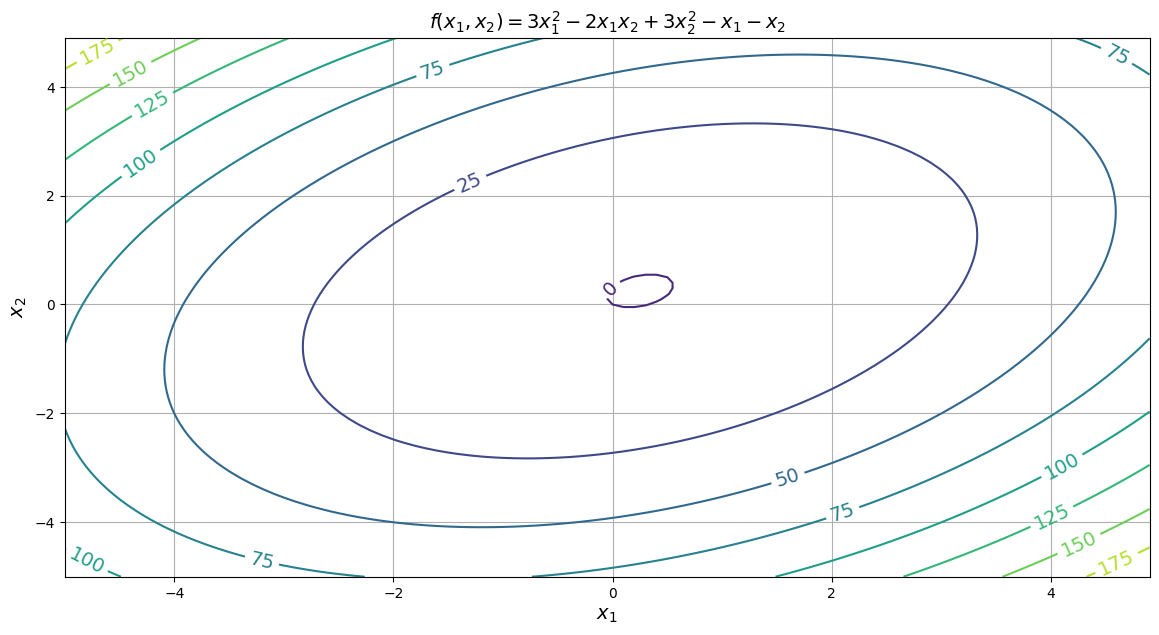

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y

x = np.vstack((np.array([np.arange(-5,5,0.1)]),
               np.array([np.arange(-5,5,0.1)])))

X,Y = np.meshgrid(x[0], x[1])
Z = pers1(X,Y)
fig, ax = plt.subplots(figsize=(14, 7))
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=14)
ax.set_title('$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $', fontsize=14)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.grid()

#### 1. Persiapkan parameter `fitness_func`

- Persiapkan parameter `fitness_func`
- Gunakan persamaan $$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $$
- Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum

In [23]:
def pers1(X,Y):
    return 3*X**2 - 2*X*Y + 3*Y**2 - X - Y

def calculate_fitness(x):
    output = pers1(x[:,0],x[:,1])

    return output

#### 2. Persiapkan parameter lainnya

In [24]:
options     = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
n_particles = 10
dimensions  = 2
max_iter    = 20

#### 3. Import `pyswarms`

In [25]:
import pyswarms as ps

#### 4. Membuat `optimizer`

1. Membuat `optimizer` berdasarkan parameter yang sudah ditentukan sebelumnya
2. Bisa menggunakan Global Best atau Personal Best

In [26]:
from pyswarms.single.global_best import GlobalBestPSO

optimizer = GlobalBestPSO(n_particles=n_particles, dimensions=dimensions, options=options)

#### 5. Jalankan PSO

In [27]:
cost, pos = optimizer.optimize(calculate_fitness, max_iter)

2024-03-07 11:49:10,505 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=-0.25 
2024-03-07 11:49:10,531 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.24975432805564643, best pos: [0.24047203 0.24573068]


#### 6. Plot hasilnya

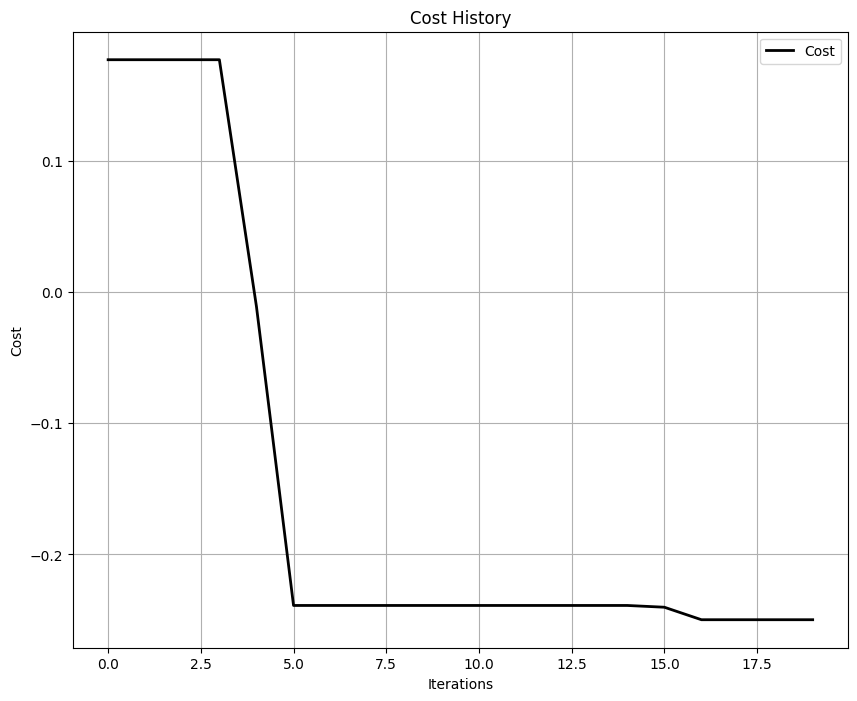

In [28]:
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)

plot_cost_history(cost_history=optimizer.cost_history)
plt.grid()
plt.show()

#### 7. Tampilkan solusi terbaik

In [29]:
print("Fitness terbaik = ", cost)
print("Posisi terbaik = ", pos)

Fitness terbaik =  -0.24975432805564643
Posisi terbaik =  [0.24047203 0.24573068]


### Contoh 2 - Travelling Salesman Problem

1. Mencari rute terbaik
2. Mengunjungi semua kedai kopi janji jiwa
3. Mulai dari ITK, kembali ke ITK

<p align="center">
  <img src="img/img2.png" width="800"/>
</p>

#### 1. Persiapkan parameter `fitness_func`

- Sama seperti yang telah kita lakukan di GA

In [30]:
import pandas as pd

data = pd.read_csv('data1.csv')
data

,JARAK (KM),ITK,INDRAKILA,GRAND CITY,MT. HARYONO,RUHUI RAHAYU,AHMAD YANI
0,ITK,0.0,1.0,1.0,14.7,16.4,20.5
1,INDRAKILA,1.0,0.0,3.3,3.7,5.4,1.0
2,GRAND CITY,1.0,3.3,0.0,1.0,4.3,9.0
3,MT. HARYONO,14.7,3.7,1.0,0.0,1.0,6.8
4,RUHUI RAHAYU,16.4,5.4,4.3,1.0,0.0,1.0
5,AHMAD YANI,20.5,1.0,9.0,6.8,1.0,0.0


In [31]:
# Fungsi merubah posisi partikel menjadi rute
def pos2route(x):

    row, col = x.shape

    for r in range(row):
        x_sorted = np.sort(x[r,:])

        x_new = np.zeros(x_sorted.shape)
        for c in range(col):
            x_new += x[r,:]/x[r,:]*(x[r,:] == x_sorted[c])*(c+1)
        
        x[r,:] = x_new

    return np.int_(x)

# Fungsi menghitung jarak berdasarkan rute
def cal_distance(route):
    distance = 0

    for i in range(len(route)):
        if i == 0:
            distance += data.iloc[0, route[i]+1]
        elif i == len(route)-1:
            distance += data.iloc[route[i-1], route[i]+1] + data.iloc[route[i], 1]
        else:
            distance += data.iloc[route[i-1], route[i]+1]

    return distance


# fitness function
def calculate_fitness(x):
    
    x = pos2route(x)

    row, col = x.shape
    output = np.zeros(row)
    
    for r in range(row):
        output[r] = cal_distance(x[r,:])

    return output

#### 2. Persiapkan parameter lainnya

In [32]:
dimensions  = len(data)-1
n_particles = 10
options     = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
max_iter    = 20

#### 3. Import `pyswarms`

In [33]:
import pyswarms as ps

#### 4. Membuat `optimizer`

1. Membuat `optimizer` berdasarkan parameter yang sudah ditentukan sebelumnya
2. Bisa menggunakan Global Best atau Personal Best

In [34]:
from pyswarms.single.global_best import GlobalBestPSO

optimizer = GlobalBestPSO(n_particles=n_particles, dimensions=dimensions, options=options)

#### 5. Jalankan PSO

In [35]:
cost, pos = optimizer.optimize(calculate_fitness, max_iter)

2024-03-07 11:49:10,884 - pyswarms.single.global_best - INFO - Optimize for 20 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|20/20, best_cost=6  
2024-03-07 11:49:10,953 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 6.0, best pos: [1. 5. 4. 3. 2.]


#### 6. Plot hasilnya

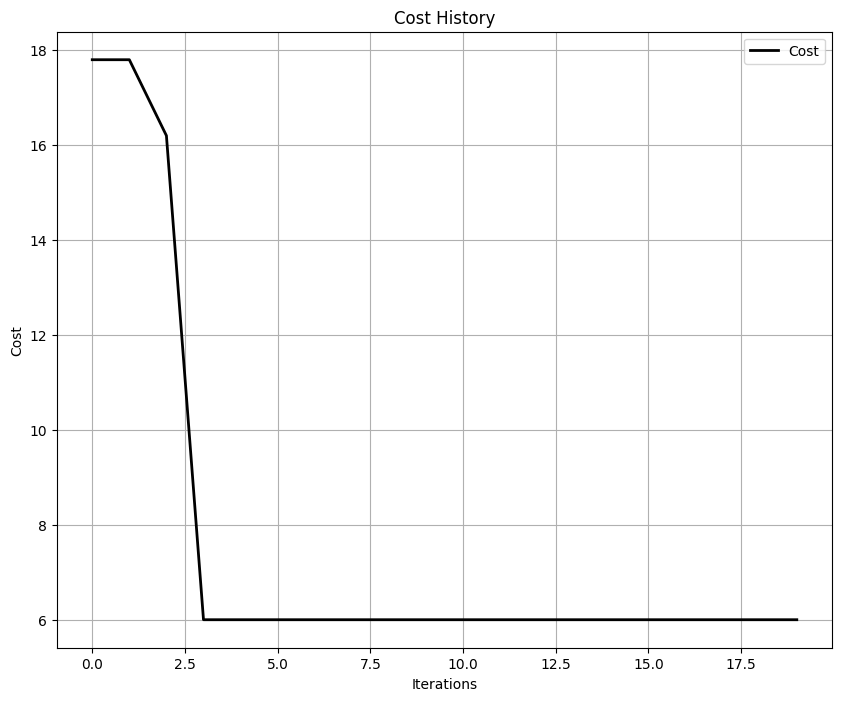

In [36]:
from pyswarms.utils.plotters import plot_cost_history

plot_cost_history(cost_history=optimizer.cost_history)
plt.grid()
plt.show()

#### 7. Tampilkan solusi terbaik

In [37]:
rute_terbaik = data.iloc[0,0]
for i in range(len(pos)):
    rute_terbaik += ' -> ' + data.iloc[np.int_(pos[i]),0]

rute_terbaik += " -> " + data.iloc[0,0]

print("Rute ngopi terbaik adalah:\n'{}'\ndengan total jarak tempuh {:.2f} km".format(rute_terbaik, cost))

Rute ngopi terbaik adalah:
'ITK -> INDRAKILA -> AHMAD YANI -> RUHUI RAHAYU -> MT. HARYONO -> GRAND CITY -> ITK'
dengan total jarak tempuh 6.00 km


## Neural Network

1. Menggunakan bahasa pemrograman python
2. Menggunakan library **TensorFow** atau **PyTorch**

- **TensorFlow** dan **PyTorch**: Python library untuk Machine Learning. Termasuk di dalamnya ada Neural Network (NN)
- [https://www.tensorflow.org/](https://www.tensorflow.org/)
- [https://pytorch.org/](https://pytorch.org/)

<p align="center">
  <img src="img/img7a.png"/>
  <img src="img/img7b.png"/>
</p>

- Cara install library **TensorFlow**:

`pip install tensorflow`

- Cara install library **PyTorch** jika memiliki GPU

`pip3 install torch torchvision torchaudio`

- Cata install library **PyTorch** jika tidak memiliki GPU

`pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu`

## Penerapan NN

### Contoh 1 - Fungsi Minimum

1. Untuk fungsi minimum, kita hanya membutuhkan `optimizer` dari **PyTorch**. Tidak sampai membuat NN.
2. Misalkan: optimalkan persamaan:

$$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $$

3. Berapa nilai $x_1$ dan $x_2$ sehingga $y$ atau $f(x_1, x_2)$ paling minimum

#### 1. Menentukan fitness function

In [38]:
def pers1(x):
    return 3*x[0]**2 - 2*x[0]*x[1] + 3*x[1]**2 - x[0] - x[1]

#### 2. Import **PyTorch**

In [39]:
import torch

#### 3. Menentukan fungsi optimizer

In [91]:
def minimize(function, initial_parameters):
    list_params = []
    params = initial_parameters
    params.requires_grad_()
    optimizer = torch.optim.Adam([params], lr=0.1)

    for i in range(100):
        optimizer.zero_grad()
        loss = function(params)
        loss.backward()
        optimizer.step()
        list_params.append(params.detach().clone()) #here
        
    return params, list_params

#### 4. Jalankan **PyTorch**

In [92]:
starting_point = torch.tensor([-5.,5.])
minimized_params, list_of_params = minimize(pers1, starting_point)

#### 5. Plot hasilnya

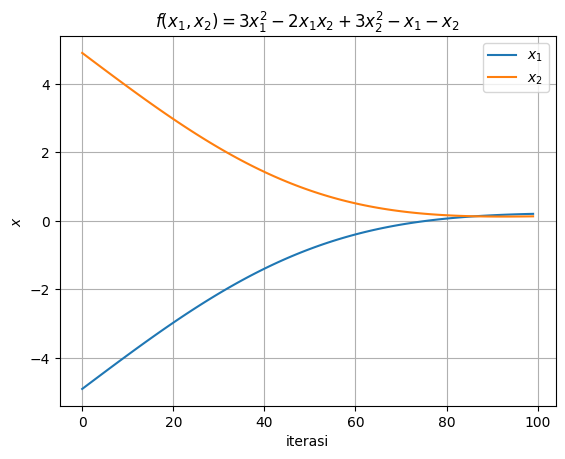

In [94]:
fig, ax = plt.subplots()
ax.plot(list_of_params, label=['$x_1$','$x_2$'])
ax.clabel(CS, inline=True)
ax.set_title('$ f(x_1, x_2) = 3x_1^2 - 2x_1x_2 + 3x_2^2 - x_1 - x_2 $')
ax.set_xlabel('iterasi')
ax.set_ylabel('$x$')
ax.legend()
ax.grid()

#### 6. Tampilkan hasilnya

In [95]:
print("nilai x_1 dan x_2 terbaik adalah {:.2f} dan {:.2f}".format(minimized_params[0], minimized_params[1]))

nilai x_1 dan x_2 terbaik adalah 0.21 dan 0.13


### Contoh 2 - Simple Regression Problem

- Misalkan diketahui suatu data sebagai berikut:

Text(0.5, 1.0, 'Data')

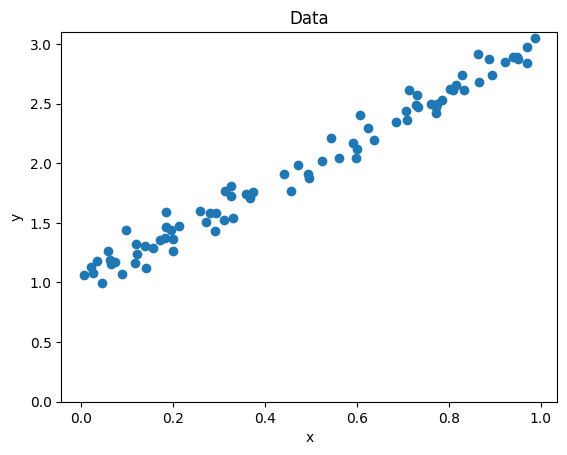

In [98]:
import numpy as np

true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
y = true_b + true_w * x + (.1 * np.random.randn(N, 1))

fig, ax = plt.subplots()
    
ax.scatter(x_train, y_train)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_ylim([0, 3.1])
ax.set_title('Data')


- Bagaimana persamaan regresi dari sekumpulan data di atas?

#### 1. Data preparation

In [123]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split

torch.manual_seed(13)

# Builds tensors from numpy arrays BEFORE split
x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

# Builds dataset containing ALL data points
dataset = TensorDataset(x_tensor, y_tensor)

# Performs the split
ratio = .8
n_total = len(dataset)
n_train = int(n_total * ratio)
n_val = n_total - n_train

train_data, val_data = random_split(dataset, [n_train, n_val])

# Builds a loader of each set
train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(dataset=val_data, batch_size=16)

#### 2. Model Configuration

In [124]:
def make_train_step_fn(model, loss_fn, optimizer):
    # Builds function that performs a step in the train loop
    def perform_train_step_fn(x, y):
        # Sets model to TRAIN mode
        model.train()
        
        # Step 1 - Computes our model's predicted output - forward pass
        yhat = model(x)
        # Step 2 - Computes the loss
        loss = loss_fn(yhat, y)
        # Step 3 - Computes gradients for both "a" and "b" parameters
        loss.backward()
        # Step 4 - Updates parameters using gradients and the learning rate
        optimizer.step()
        optimizer.zero_grad()
        
        # Returns the loss
        return loss.item()
    
    # Returns the function that will be called inside the train loop
    return perform_train_step_fn

In [125]:
def make_val_step_fn(model, loss_fn):
    # Builds function that performs a step in the validation loop
    def perform_val_step_fn(x, y):
        # Sets model to EVAL mode
        model.eval()
        
        # Step 1 - Computes our model's predicted output - forward pass
        yhat = model(x)
        # Step 2 - Computes the loss
        loss = loss_fn(yhat, y)
        # There is no need to compute Steps 3 and 4, since we don't update parameters during evaluation
        return loss.item()
    
    return perform_val_step_fn

In [126]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1

torch.manual_seed(42)
# Now we can create a model and send it at once to the device
model = nn.Sequential(nn.Linear(1, 1)).to(device)

# Defines a SGD optimizer to update the parameters (now retrieved directly from the model)
optimizer = optim.SGD(model.parameters(), lr=lr)

# Defines a MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

# Creates the train_step function for our model, loss function and optimizer
train_step_fn = make_train_step_fn(model, loss_fn, optimizer)

# Creates the val_step function for our model and loss function
val_step_fn = make_val_step_fn(model, loss_fn)

# Fetches a single mini-batch so we can use add_graph
x_sample, y_sample = next(iter(train_loader))

#### 3. Model Training

In [127]:
def mini_batch(device, data_loader, step_fn):
    mini_batch_losses = []
    for x_batch, y_batch in data_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        mini_batch_loss = step_fn(x_batch, y_batch)
        mini_batch_losses.append(mini_batch_loss)

    loss = np.mean(mini_batch_losses)
    return loss

In [128]:
# %load model_training/v5.py

# Defines number of epochs
n_epochs = 50

losses = []
val_losses = []

for epoch in range(n_epochs):
    # inner loop
    loss = mini_batch(device, train_loader, train_step_fn)
    losses.append(loss)
    
    # VALIDATION
    # no gradients in validation!
    with torch.no_grad():
        val_loss = mini_batch(device, val_loader, val_step_fn)
        val_losses.append(val_loss)


####  4. Plot hasilnya

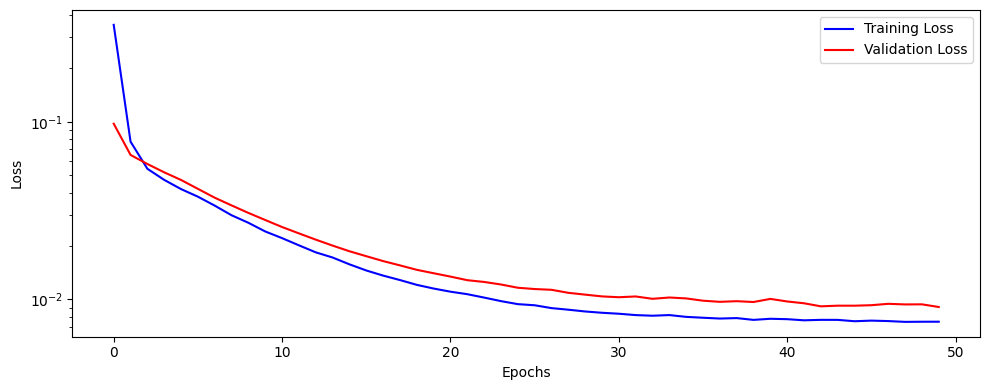

In [129]:
fig = plt.figure(figsize=(10, 4))
plt.plot(losses, label='Training Loss', c='b')
plt.plot(val_losses, label='Validation Loss', c='r')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()

#### 5. Tampilkan hasilnya

In [130]:
print(model.state_dict())

OrderedDict([('0.weight', tensor([[1.9203]])), ('0.bias', tensor([1.0418]))])
